# Random Forests - Visualization

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
# import pydotplus

from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from IPython.core.display import display, HTML

import RandomForestHelper as RFH

## Example

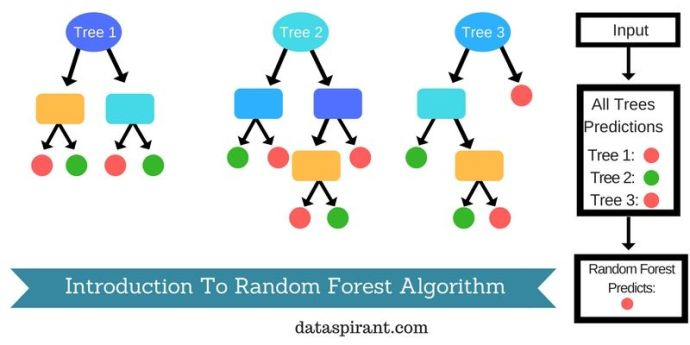

In [2]:
Image(filename="Random-Forest-Introduction.jpg")

In [3]:
%config IPCompleter.greedy=True

Refer: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Parameters for a Random Forest:

<ul>
	<li>n_estimators</li>
	<li>criterion</li>
	<li>max_features</li>
	<li>max_depth</li>
	<li>min_samples_split</li>
	<li>min_samples_leaf</li>
	<li>min_weight_fraction_leaf</li>
	<li>max_leaf_nodes</li>
	<li>min_impurity_split</li>
	<li>min_impurity_decrease</li>
	<li>bootstrap</li>
	<li>oob_score</li>
	<li>n_jobs</li>
	<li>random_state</li>
	<li>verbose</li>
	<li>warm_start</li>
	<li>class_weight</li>
</ul>

# The Iris flower dataset

<ul>
    <li>Consists of 50 samples from each of the three flower species of Iris (Iris setosa, Iris virginica and Iris versicolor). </li>
    <li>Four features present for each sample: the length and the width of the sepals and petals, in centimetres. </li>
</ul>

In [4]:
#Loading the Iris dataset from sklearn
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [5]:
#IRIS Dataset
print(df.sample(10))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
79                 5.7               2.6                3.5               1.0
149                5.9               3.0                5.1               1.8
105                7.6               3.0                6.6               2.1
119                6.0               2.2                5.0               1.5
29                 4.7               3.2                1.6               0.2
112                6.8               3.0                5.5               2.1
82                 5.8               2.7                3.9               1.2
25                 5.0               3.0                1.6               0.2
21                 5.1               3.7                1.5               0.4
111                6.4               2.7                5.3               1.9


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

# The random forest classifier

Parameters being changed:
1. **Max_depth**: The deepest level to which a decision tree can go to
2. **n_estimators**: The number of decision trees that are generated and eventually used for majority voting

In [7]:
rf = RandomForestClassifier(max_depth=10, n_estimators=111)
rf = rf.fit(X_train, y_train)

## Predicting Category

1. Different decision trees are generated from the input data.
2. For each sample, the category is decided based on the decision tree.
3. The final prediction is done by some form of ensemble learning on the outputs of the different trees. In this scenario, we use majority voting (Category that gets the most votes is predicted).

In [8]:
pred = RFH.predict_category(rf, X_test)
html = RFH.generate_html(rf, X_test, pred)

In [9]:
HTML(html)

,DTree 0,DTree 1,DTree 2,DTree 3,DTree 4,DTree 5,DTree 6,DTree 7,DTree 8,DTree 9,DTree 10,DTree 11,DTree 12,DTree 13,DTree 14,DTree 15,DTree 16,DTree 17,DTree 18,DTree 19,DTree 20,DTree 21,DTree 22,DTree 23,DTree 24,DTree 25,DTree 26,DTree 27,DTree 28,DTree 29,DTree 30,DTree 31,DTree 32,DTree 33,DTree 34,DTree 35,DTree 36,DTree 37,DTree 38,DTree 39,DTree 40,DTree 41,DTree 42,DTree 43,DTree 44,DTree 45,DTree 46,DTree 47,DTree 48,DTree 49,DTree 50,DTree 51,DTree 52,DTree 53,DTree 54,DTree 55,DTree 56,DTree 57,DTree 58,DTree 59,DTree 60,DTree 61,DTree 62,DTree 63,DTree 64,DTree 65,DTree 66,DTree 67,DTree 68,DTree 69,DTree 70,DTree 71,DTree 72,DTree 73,DTree 74,DTree 75,DTree 76,DTree 77,DTree 78,DTree 79,DTree 80,DTree 81,DTree 82,DTree 83,DTree 84,DTree 85,DTree 86,DTree 87,DTree 88,DTree 89,DTree 90,DTree 91,DTree 92,DTree 93,DTree 94,DTree 95,DTree 96,DTree 97,DTree 98,DTree 99,DTree 100,DTree 101,DTree 102,DTree 103,DTree 104,DTree 105,DTree 106,DTree 107,DTree 108,DTree 109,DTree 110,Prediction
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
138,2,2,1,2,2,2,2,2,2,2,1,1,2,1,2,2,2,1,2,2,1,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,1,2,2,2,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2
47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
147,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
108,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
97,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
92,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Visualizing a specific Decision Tree from a Random Forest

In [10]:
legend = """Attributes: 
    <ul>
        <li><b>X0, X1, X2, X3</b>: sepal length, sepal width, petal length, petal width</li>
        <li><b>Samples</b>: Number of samples considered for building this decision tree</li>
        <li><b>Value</b>: Number of samples in each of the three categories of flowers in order</li>
    </ul>
    """

Decision Tree 0 : 


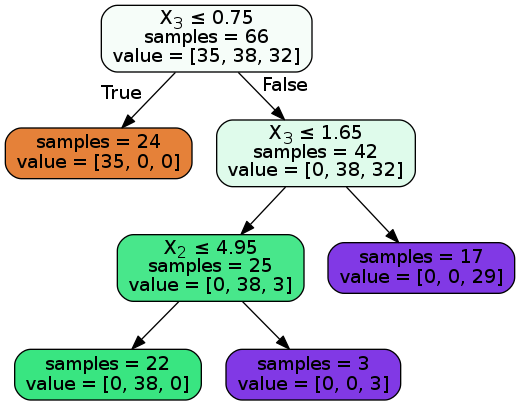

In [11]:
RFH.generate_tree(rf, 0, height=500, width=400) #ith Decision Tree: Where i is the Decision Tree number according to the above table)
HTML(legend)

In [12]:
#To get information on ith value in the pandas dataframe
df.iloc[77]

sepal length (cm)    6.7
sepal width (cm)     3.0
petal length (cm)    5.0
petal width (cm)     1.7
Name: 77, dtype: float64

**You are encouraged to explore the RandomForestCalssifier by altering parameters passed to it.**

# Confidence Margin

In [13]:
def compute_points(p1, p2, p3):
    #Plot between (x1, y1), (x2, y2) and (x3, y3)
    x1, y1 = 0, 0
    x2, y2 = 1, 0
    x3, y3 = 0.5, 0.87
    return 1.0 * (p1*x1 + p2*x2 + p3*x3), 1.0 * (p1*y1 + p2*y2 + p3*y3)

In [14]:
pred = RFH.predict_category(rf, X_test)

In [15]:
x_list_0 = []
y_list_0 = []
x_list_1 = []
y_list_1 = []
x_list_2 = []
y_list_2 = []
x_list_3 = []
y_list_3 = []
pred_list = []
for i in range(len(pred)):
    p1 = 1.0 * list(pred[i]).count(0)/len(pred[i])
    p2 = 1.0 * list(pred[i]).count(1)/len(pred[i])
    p3 = 1.0 * list(pred[i]).count(2)/len(pred[i])
    x, y = compute_points(p1, p2, p3)
    
    if p1 > p2 and p1 > p3:
        x_list_0.append(x)
        y_list_0.append(y)
        pred_list.append(0)
    elif p2 > p1 and p2 > p3:
        x_list_1.append(x)
        y_list_1.append(y)
        pred_list.append(1)
    elif p3 > p2 and p3 > p1:
        x_list_2.append(x)
        y_list_2.append(y)
        pred_list.append(2)

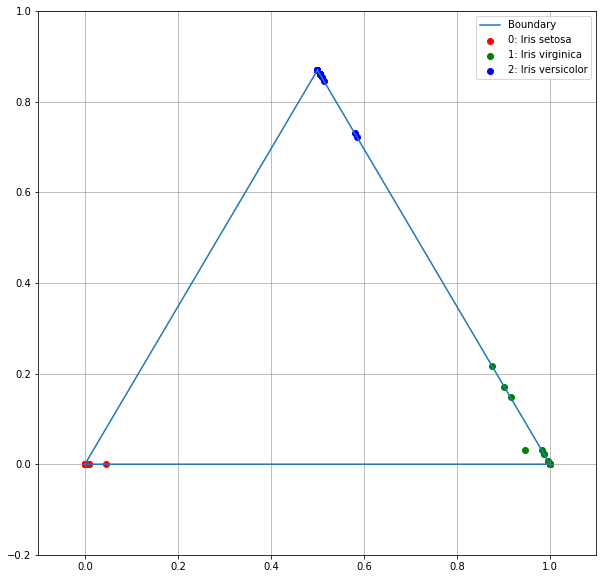

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
1, 2
A = 0.5, 0, 1, 0.5
B = round((3**0.5)*0.5,2), 0, 0, round((3**0.5)*0.5,2)

plt.plot(A,B)
x = np.linspace(0, 10, 1000)

i=-1
for xy in zip(A, B):   
    ax.annotate('', xy=xy, textcoords='data')
    i += 1

plt.scatter(x_list_0, y_list_0, c='r')
plt.scatter(x_list_1, y_list_1, c='g')
plt.scatter(x_list_2, y_list_2, c='b')
plt.legend(['Boundary', '0: Iris setosa', '1: Iris virginica', '2: Iris versicolor'])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')


plt.xlim(-0.1, 1.1)
plt.ylim(-0.2, 1)
plt.show()

In [20]:
print("Accuracy: ", sum(pred_list == y_test)/len(y_test))

Accuracy:  0.9777777777777777
